In [1]:
import paths
import h5py
import numpy as np
import scipy.linalg as spl
from cklemap.sdfs.geom_mrst import GeomMRST
from matplotlib import pyplot as plt, path as mpath, collections as mc, patches as mpatches, cm, ticker

In [2]:
plt.rc('text', usetex=True)
plt.rc('image', cmap='plasma')

def plot_patch(patches, values, fig, ax, points, title=None, cmin=None, cmax=None, cb=False):
    p = mc.PatchCollection(patches, cmap=cm.jet)
    p.set_array(values)
    p.set_clim([cmin, cmax])
    ax.add_collection(p)
    if points is not None:
        ax.plot(*points, 'wo', markersize=0.5)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.autoscale(tight=True)
    if title is not None:
        ax.set_title(title)
    if cb:
        cbar = fig.colorbar(p, ax=ax)
        cbar.ax.tick_params(labelsize='24')
        cbar.locator = ticker.MaxNLocator(nbins=6)
        cbar.update_ticks()
    return p

In [3]:
amps = False
resolution = '4x'
t_range = [9]
#Nuobs = 323
Nuobs = 408
NYobs = 200
NYlearn = NYobs
NYrefobs = 50
NYxi = 1000
gamma_map = 1e-6
lsq_method = 'trf'
data_path = '../data/'
results_path = '../results/'
figures_path = '../figures/'
geom_filename = data_path + f'geom/geom_{resolution}.mat'
yobs_filename = data_path + f'yobs/yobs_{NYobs}_{resolution}.npy'
conduct_filename = data_path + f'RF1/conduct_log_RF1_{resolution}.mat'
#ref = f"Yref=gpml_{NYrefobs}_{resolution}"
#exp = f'NY={NYobs}_Nu={Nuobs}_{NYlearn=}_{Nuxi=}_{NYxi=}_beta={beta_ckli}_gamma={ugamma_ckli}_Neumann_sd={Neumann_sd}_{lsq_method=}_{ref}'
ref_MAP = f'Yref=RF1'
exp_MAP = f'NY={NYobs}_Nu={Nuobs}_{NYlearn=}_gamma={gamma_map}_{lsq_method=}_h1reg_{amps=}_{ref_MAP}'
#ref_CKLEMAP = f'Yref=orig'
ref_CKLEMAP = f'Yref=orig_interpolated_{resolution}'
exp_CKLEMAP = f'NY={NYobs}_Nu={Nuobs}_{NYlearn=}_{NYxi=}_gamma={gamma_map}_cklmap_h1reg_{amps=}_{ref_CKLEMAP}'
print(exp_MAP)
print(exp_CKLEMAP)

NY=200_Nu=408_NYlearn=200_gamma=1e-06_lsq_method='trf'_h1reg_amps=False_Yref=RF1
NY=200_Nu=408_NYlearn=200_NYxi=1000_gamma=1e-06_cklmap_h1reg_amps=False_Yref=orig_interpolated_4x


In [4]:
geom = GeomMRST(geom_filename)
iYobs = np.load(yobs_filename)

In [5]:
patches = [mpatches.Polygon(v, closed=True) for v in geom.nodes.coords.T[geom.cells.nodes.T, :]]

In [6]:
Yfac = 7.0
mpre = lambda yest, yref : np.max(np.absolute(yest - yref) / (yref + Yfac))
rl2e = lambda yest, yref : spl.norm(yest - yref, 2) / spl.norm(yref + Yfac, 2)

In [7]:
Yref = np.loadtxt(results_path + f'Yref/Yref_NYlearn={NYlearn}_Yref=orig_interpolated_{resolution}.txt')
Yest_MAPH1 = np.loadtxt(results_path + f'YMAP/YMAP_{exp_MAP}.txt')
Yest_CKLEMAPH1 = np.loadtxt(results_path + f'YMAP/YMAP_{exp_CKLEMAP}.txt')
#with h5py.File(conduct_filename, 'r') as f:
#    Yref = f.get('conduct_log')[:].ravel() - Yfac

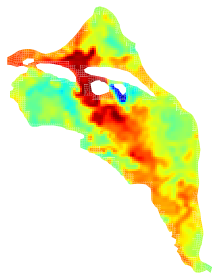

In [8]:
for t in t_range:
    fig, ax = plt.subplots(figsize=(4, 4))
    plot_patch(patches, np.abs(Yref[t] + Yfac), fig, ax, None, None, 0, 12)
    fig.tight_layout()
    fig.savefig(figures_path + f'Yref/Yref_{ref_MAP}.pdf', dpi=300)

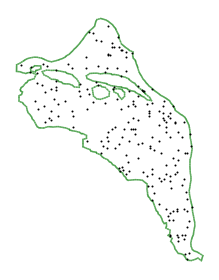

In [9]:
for t in t_range:
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.plot(*geom.nodes.coords[:, geom.faces.nodes[:,
                                                   geom.faces.num_interior:]], '#228b2280')
    ax.plot(*geom.cells.centroids[:, iYobs[t]], 'ko', markersize=1)
    ax.set_aspect('equal')
    ax.axis('off')
    fig.tight_layout()
    fig.savefig(
        figures_path + f'obs_loc/hanford_mesh_{resolution}_{NYobs=}_{t=}.pdf', dpi=300, bbox_inches='tight')


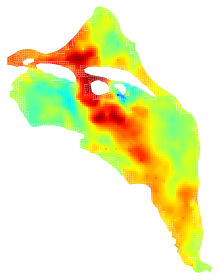

In [10]:
for t in t_range:
    fig, ax = plt.subplots(figsize=(4, 4))
    plot_patch(patches, Yest_MAPH1[t] + Yfac, fig, ax, None, None, 0, 12)
    fig.tight_layout()
    fig.savefig(figures_path +
                f'YMAP/YMAP_{exp_MAP}_{t=}.pdf', dpi=300, bbox_inches='tight')


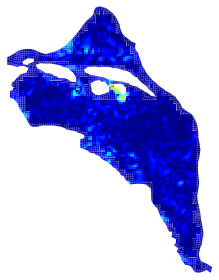

In [11]:
for t in t_range:
    fig, ax = plt.subplots(figsize=(4, 4))
    plot_patch(patches, np.abs(Yest_MAPH1[t] - Yref[t]), fig, ax, None, None, 0, 6)
    fig.tight_layout()
    fig.savefig(
        figures_path + f'Ydiff_MAP/Ydiff_MAP_{exp_MAP}_{t=}.pdf', dpi=300, bbox_inches='tight')


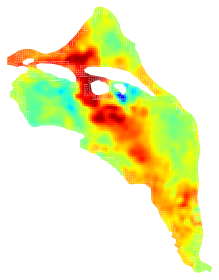

In [12]:
for t in t_range:
    fig, ax = plt.subplots(figsize=(4, 4))
    plot_patch(patches, Yest_CKLEMAPH1[t] + Yfac, fig, ax, None, None, 0, 12)
    fig.tight_layout()
    fig.savefig(
        figures_path + f'YCKLEMAP/YCKLEMAP_{exp_MAP}_{t=}.pdf', dpi=300, bbox_inches='tight')


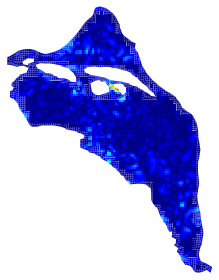

In [13]:
for t in t_range:
    fig, ax = plt.subplots(figsize=(4, 4))
    plot_patch(patches, np.abs(Yest_CKLEMAPH1[t] - Yref[t]), fig, ax, None, None, 0, 6)
    fig.tight_layout()
    fig.savefig(
        figures_path + f'Ydiff_CKLEMAP/Ydiff_CKLEMAP_{exp_MAP}_{t=}.pdf', dpi=300, bbox_inches='tight')


In [6]:
with h5py.File(f'hanford/gpml/hanford_david_{NYrefobs}_{resolution}.mat', 'r') as f:
    Yref = f.get('mu')[:].ravel()

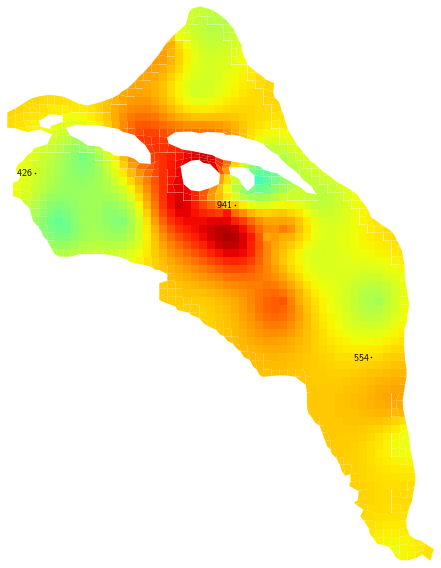

In [7]:
indices = [426, 554, 941]
fig, ax = plt.subplots(figsize=(8, 8))
p = plot_patch(patches, Yref, fig, ax, geom.cells.centroids[:, indices], 'Yref', 0, 12)
#for i in indices:
#    plt.annotate(i, geom.cells.centroids[:, i], textcoords="offset points", xytext=(-3, -3), ha='right')
fig.tight_layout()
fig.savefig(f'hanford/figures/location_{indices}.pdf', dpi=300)

In [9]:
Yref = np.loadtxt(f'hanford/results/YGPR/YGPR_{exp}.txt')
Ypickle = np.loadtxt(f'hanford/results/YPICKLE/YPICKLE_{exp}.txt')
Ymap = np.loadtxt(f'hanford/results/YMAP/YMAP_{exp}.txt')

print(Yref.shape)
print(Ypickle.shape)
print(Ymap.shape)

(5900,)
(10, 5900)
(10, 5900)


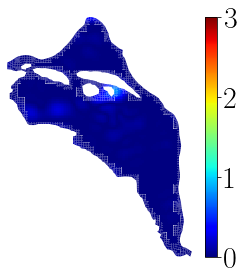

In [14]:
fig, ax = plt.subplots(figsize=(4, 4))
p = plot_patch(patches, np.abs(Ypickle[0] - Yref), fig, ax, None, 'Ypickle', 0, 3)
cbar = fig.colorbar(p, ax=ax)
cbar.ax.tick_params(labelsize='30')
fig.tight_layout()
fig.savefig(f'hanford/figures/Yref/Ypickle_{ref}.pdf', dpi=300)

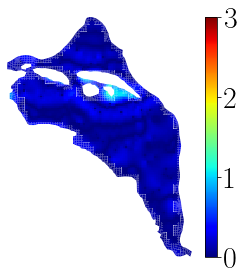

In [12]:
fig, ax = plt.subplots(figsize=(4, 4))
p = plot_patch(patches, np.abs(Ymap[0] - Yref), fig, ax, None, 'Ymap', 0, 3)
cbar = fig.colorbar(p, ax=ax)
cbar.ax.tick_params(labelsize='30')
fig.tight_layout()
fig.savefig(f'hanford/figures/Yref/Ymap_{ref}.pdf', dpi=300)